# Setup

In [95]:
# import common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import specific components from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# enhanced stats functions
from scipy import stats



In [96]:
print(f"pandas version  : {pd.__version__}")  
print(f"numpy version   : {np.__version__}")  
print(f"seaborn version : {sns.__version__}") 

In [97]:
SEED = 123
np.random.seed(SEED)

# Data Loading


In [ ]:
df = pd.read_csv('insurance.csv')

In [99]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


# EDA


In [100]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [101]:
median_age = df['age'].median()
print(median_age)

39.0


In [102]:
index_of_highest_bmi = df['bmi'].idxmax()
print("Index of the person with the highest BMI:", index_of_highest_bmi)

Index of the person with the highest BMI: 1317


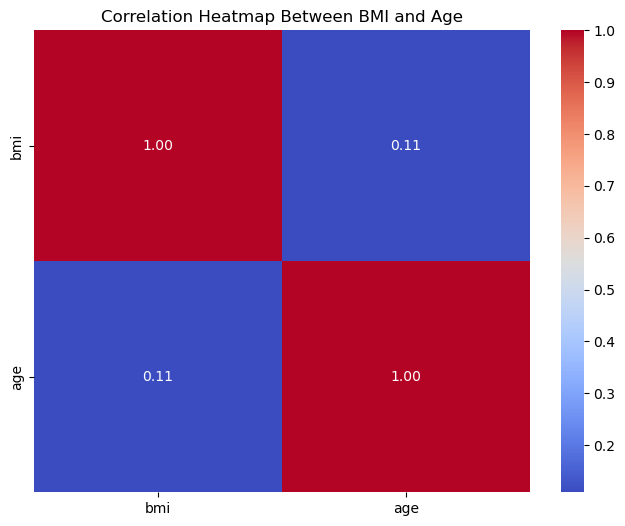

In [103]:
correlation_matrix = df[['bmi', 'age']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap Between BMI and Age')
plt.show()

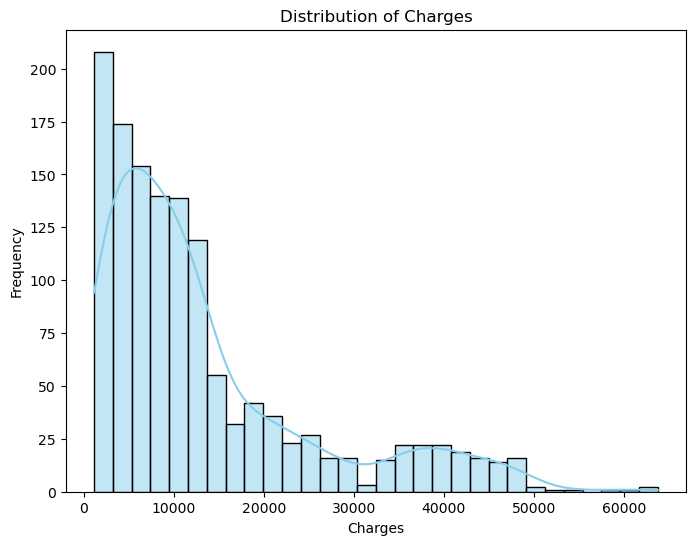

In [104]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='charges', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

In [105]:
df['log_charges'] = np.log(df['charges'])

df = df.drop(columns=['charges'])

In [106]:
df.head(2)

,age,sex,bmi,children,smoker,region,log_charges
0,19,female,27.90,0,yes,southwest,9.734176
1,18,male,33.77,1,no,southeast,7.453302


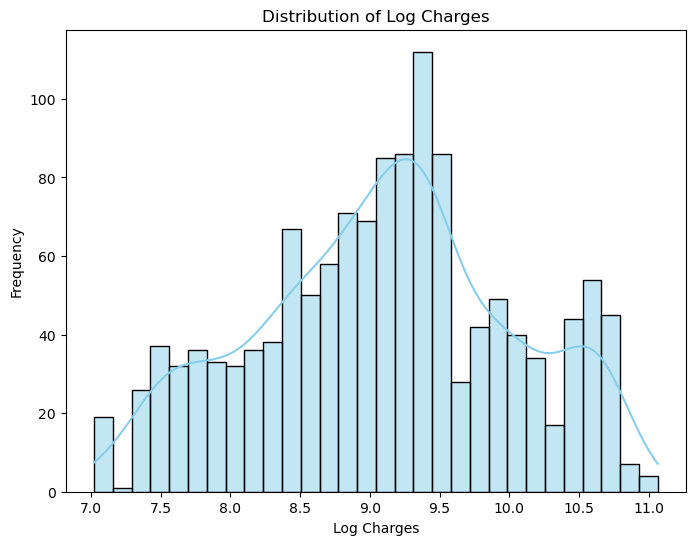

In [107]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='log_charges', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Log Charges')
plt.xlabel('Log Charges')
plt.ylabel('Frequency')
plt.show()

In [108]:
duplicates = df[df.duplicated()]

duplicate_indexes = duplicates.index

print("Indexes of duplicated rows:", duplicate_indexes)

Indexes of duplicated rows: Int64Index([581], dtype='int64')


# Data Wrangling


In [109]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)



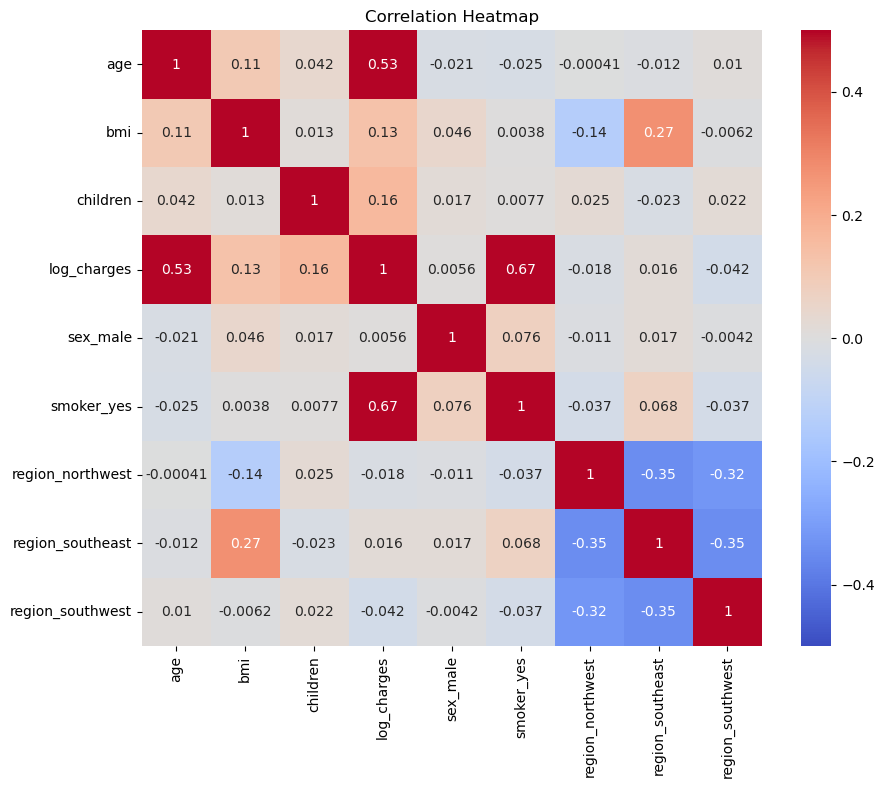

In [110]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-0.5, vmax=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [111]:
num_independent_variables = df.shape[1] - 1  

print("Number of independent variables:", num_independent_variables)

Number of independent variables: 8


In [112]:
X = df.drop(columns=['log_charges'])  
y = df['log_charges']

In [113]:
print(X.shape)
print(y.shape)

(1338, 8)
(1338,)


In [114]:
seed=42 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)


In [115]:
first_five_indexes= X_train.head().index
first_five_indexes

Int64Index([332, 355, 138, 381, 292], dtype='int64')

# Modelling and Evaluation
Now we can make our model! Instantiate a LinearRegression model in scikit-learn, then fit the training data on it.



In [116]:

lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [117]:
print(f"intercept: {lr.intercept_:.4f}")
for i in range(len(X_train.columns)):
    print(f"{X_train.columns[i]}: {lr.coef_[i]:.4f}")

intercept: 7.0307
age: 0.0345
bmi: 0.0139
children: 0.0951
sex_male: -0.0788
smoker_yes: 1.5526
region_northwest: -0.0648
region_southeast: -0.1592
region_southwest: -0.1234


In [118]:
predictions_train = lr.predict(X_train)

In [119]:
r2_train = lr.score(X_train, y_train)
print(r2_train)

0.7606778619658179


In [120]:
mae_train = mean_absolute_error(y_train, predictions_train)
print(mae_train)

0.2840777103273191


In [121]:
mse_train = mean_squared_error(y_train,predictions_train)

rmse_train = np.sqrt(mse_train)
print(rmse_train)


0.4504311344835306


In [122]:
print("metrics for training data")
print(f"R^2 score : {r2_train:.4f}")
print(f"mae       : {mae_train:.4f}")
print(f"rmse      : {rmse_train:.4f}")

metrics for training data
R^2 score : 0.7607
mae       : 0.2841
rmse      : 0.4504


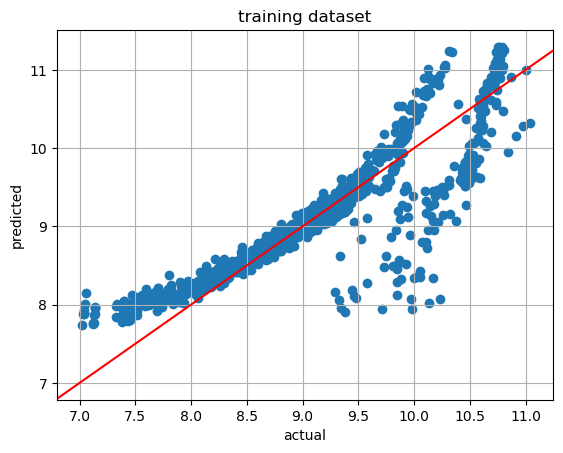

In [123]:
plt.scatter(y_train, predictions_train)
plt.title("training dataset")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.gca().axline([7, 7], [11, 11], color="red")
plt.grid()

In [124]:
predictions_test = lr.predict(X_test)


In [125]:
r2_test = lr.score(X_test, y_test)
mae_test = mean_absolute_error(y_test, predictions_test)
mse_test = mean_squared_error(y_test,predictions_test)

rmse_test = np.sqrt(mse_test)


In [126]:
print("metrics for test data")
print(f"R^2 score : {r2_test:.4f}")
print(f"mae       : {mae_test:.4f}")
print(f"rmse      : {rmse_test:.4f}")

metrics for test data
R^2 score : 0.7845
mae       : 0.2656
rmse      : 0.4248


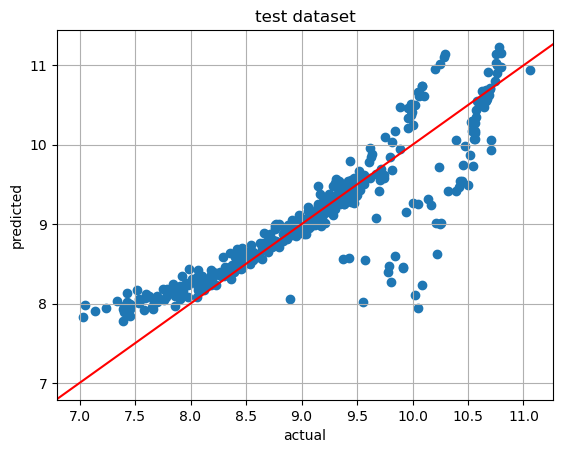

In [127]:
plt.scatter(y_test, predictions_test)
plt.title("test dataset")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.gca().axline([7, 7], [11, 11], color="red")
plt.grid()

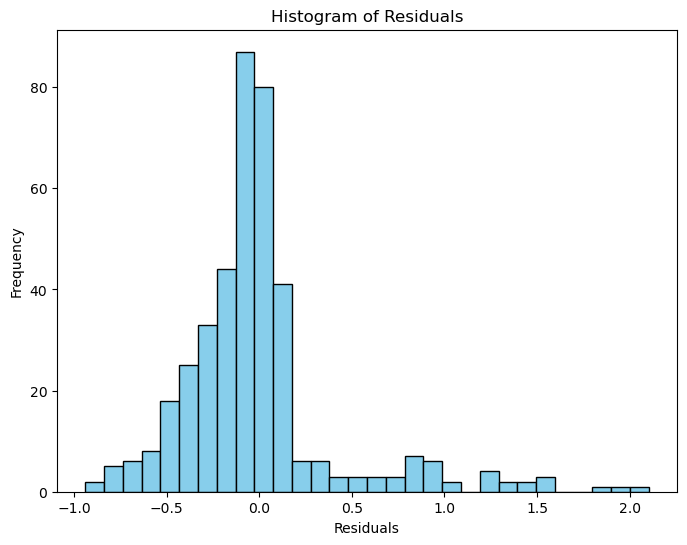

In [128]:
residuals = y_test - predictions_test

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [129]:

features_for_prediction = X_test.loc[[650]]

charge = lr.predict(features_for_prediction)

print("Predicted insurance charge for index 650:", charge[0])

Predicted insurance charge for index 650: 9.344872685178784


intercept           : 0.6965
age                 : -0.4277
bmi                 : -0.5463
children            : 0.1026
sex_male            : 0.4389
smoker_yes          : -0.1538
region_northwest    : 0.9615
region_southeast    : 0.3697
region_southwest    : -0.0381
------------------------
Predicted insurance charges: 3921.18


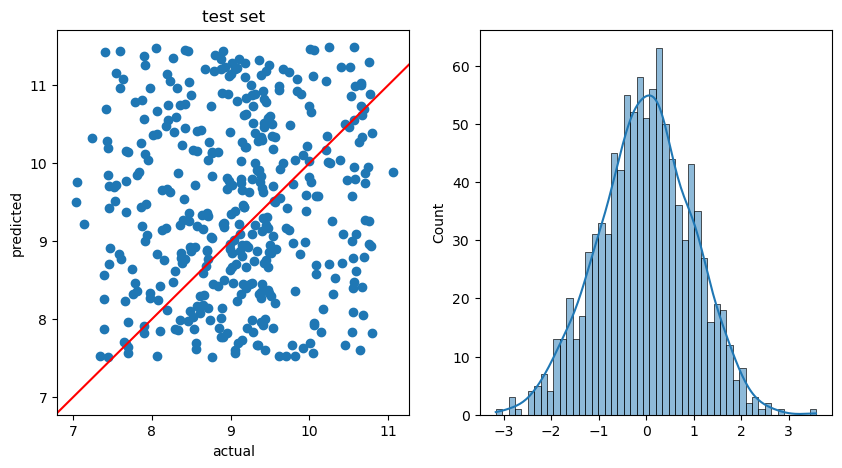

In [130]:
print(f"{'intercept':<20}: {np.random.random():.4f}")
for col in X_train.columns:
    print(f"{col:<20}: {np.random.random()*2-1:.4f}")
print("---"*8)
print(f"Predicted insurance charges: {np.random.random()*10000:.2f}")

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10,5)

ax1.scatter(y_test, np.random.random(y_test.shape)*4+7.5)
ax1.axline([7, 7], [11, 11], color="red")
ax1.set_title("test set")
ax1.set_xlabel("actual")
ax1.set_ylabel("predicted")

sns.histplot(np.random.normal(size=1000), bins=50, kde=True, ax=ax2)

plt.show()